# Import Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from collections import Counter
from wordcloud import WordCloud

# Load Dataset

In [2]:
dir_ = "dataset/"
file_labeled = dir_ + 'oshibe_spv_comments_2025-01-15_labeled_lexicon.csv'
comments = pd.read_csv(file_labeled)
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11650 entries, 0 to 11649
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   11650 non-null  object
 1   Username             11650 non-null  object
 2   Comment              11650 non-null  object
 3   LikeCount            11650 non-null  int64 
 4   ReplyCount           11650 non-null  int64 
 5   Date                 11650 non-null  object
 6   Comment_clean        11650 non-null  object
 7   Comment_clean_words  11504 non-null  object
 8   Sentiment_score      11650 non-null  int64 
 9   Sentiment            11650 non-null  object
dtypes: int64(3), object(7)
memory usage: 910.3+ KB


# Overall Sentiment

In [3]:
# Define Font Size & Colors
TITLE_FONT_SIZE = 15
JKT48_COLORS = ['red', 'darkgray', 'black']

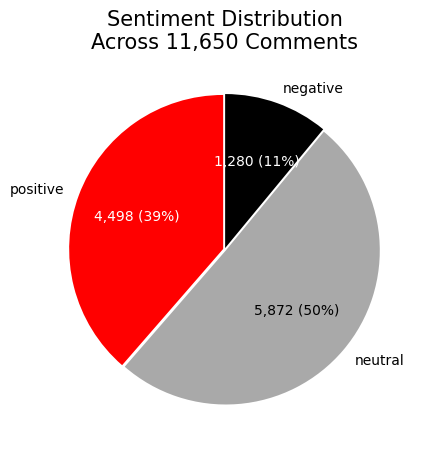

In [4]:
# Count the values in the Sentiment column and reorder
sentiment_order = ["positive", "neutral", "negative"]
sentiment_counts = comments['Sentiment'].value_counts()
sentiment_counts = sentiment_counts.reindex(sentiment_order)
total_count = len(comments)

# Create pie chart
plt.figure(figsize=(5, 5))  # Adjust the figure size for a square aspect ratio
wedges, texts, autotexts = plt.pie(
    sentiment_counts.values,
    labels=sentiment_counts.index,
    colors=JKT48_COLORS,
    startangle=90,
    autopct=lambda p: f'{int(p * total_count / 100):,} ({p:.0f}%)',
    explode=(0.01, 0.01, 0.01)  # Optional: explode the first slice for emphasis
)

# Set specific colors for the data labels inside the pie chart
for i, autotext in enumerate(autotexts):
    if i == 0 or i == 2:  # Positive and Negative
        autotext.set_color('white')  # Set to white for positive and negative
    else:  # Neutral
        autotext.set_color('black')  # Set to black for neutral

# Customize chart
plt.title(f'Sentiment Distribution\nAcross {total_count:,} Comments', fontsize=TITLE_FONT_SIZE)

plt.show()


- Secara keseluruhan, terdapat 39% komentar positif, 50% netral, dan 11% negatif

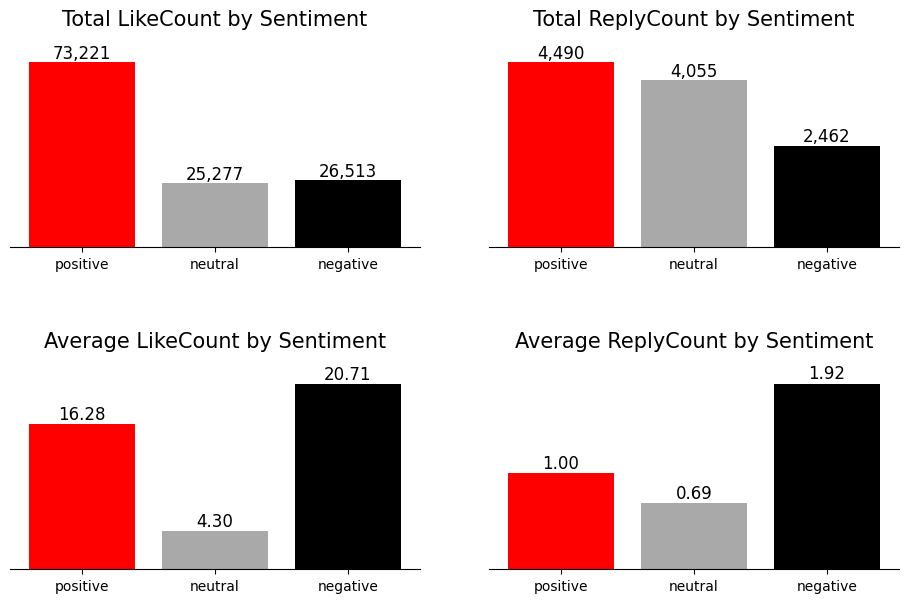

In [5]:
# Calculate total LikeCount and ReplyCount for each sentiment
like_counts = comments.groupby('Sentiment')['LikeCount'].sum().reindex(sentiment_order)
reply_counts = comments.groupby('Sentiment')['ReplyCount'].sum().reindex(sentiment_order)

# Calculate average LikeCount and ReplyCount per comment
average_like_counts = comments.groupby('Sentiment')['LikeCount'].mean().reindex(sentiment_order)
average_reply_counts = comments.groupby('Sentiment')['ReplyCount'].mean().reindex(sentiment_order)

# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 7))

# Bar chart for LikeCount
bars1 = axs[0, 0].bar(
    like_counts.index,
    like_counts.values,
    color=JKT48_COLORS
)

# Add data labels for LikeCount
for bar, count in zip(bars1, like_counts.values):
    axs[0, 0].text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 2,  # Add extra space
        f"{count:,}",  # Format count with commas
        ha='center',
        va='bottom',
        fontsize=12,
        color='black'
    )

# Customize LikeCount chart
axs[0, 0].set_title('Total LikeCount by Sentiment', fontsize=TITLE_FONT_SIZE, y=1.1)
axs[0, 0].set_xticks(like_counts.index)
axs[0, 0].tick_params(axis='x', rotation=0)
axs[0, 0].set_yticks([])  # Remove y-axis ticks
axs[0, 0].spines['left'].set_visible(False)  # Remove y-axis line
axs[0, 0].spines['top'].set_visible(False)  # Remove top line
axs[0, 0].spines['right'].set_visible(False)  # Remove right line

# Bar chart for ReplyCount
bars2 = axs[0, 1].bar(
    reply_counts.index,
    reply_counts.values,
    color=JKT48_COLORS
)

# Add data labels for ReplyCount
for bar, count in zip(bars2, reply_counts.values):
    axs[0, 1].text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 2,  # Add extra space
        f"{count:,}",  # Format count with commas
        ha='center',
        va='bottom',
        fontsize=12,
        color='black'
    )

# Customize ReplyCount chart
axs[0, 1].set_title('Total ReplyCount by Sentiment', fontsize=TITLE_FONT_SIZE, y=1.1)
axs[0, 1].set_xticks(reply_counts.index)
axs[0, 1].tick_params(axis='x', rotation=0)
axs[0, 1].set_yticks([])  # Remove y-axis ticks
axs[0, 1].spines['left'].set_visible(False)  # Remove y-axis line
axs[0, 1].spines['top'].set_visible(False)  # Remove top line
axs[0, 1].spines['right'].set_visible(False)  # Remove right line

# Bar chart for Average LikeCount per comment
bars3 = axs[1, 0].bar(
    average_like_counts.index,
    average_like_counts.values,
    color=JKT48_COLORS
)

# Add data labels for Average LikeCount
for bar, count in zip(bars3, average_like_counts.values):
    axs[1, 0].text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.1,  # Add extra space
        f"{count:.2f}",  # Format count with two decimal places
        ha='center',
        va='bottom',
        fontsize=12,
        color='black'
    )

# Customize Average LikeCount chart
axs[1, 0].set_title('Average LikeCount by Sentiment', fontsize=TITLE_FONT_SIZE, y=1.1)
axs[1, 0].set_xticks(average_like_counts.index)
axs[1, 0].tick_params(axis='x', rotation=0)
axs[1, 0].set_yticks([])  # Remove y-axis ticks
axs[1, 0].spines['left'].set_visible(False)  # Remove y-axis line
axs[1, 0].spines['top'].set_visible(False)  # Remove top line
axs[1, 0].spines['right'].set_visible(False)  # Remove right line

# Bar chart for Average ReplyCount per comment
bars4 = axs[1, 1].bar(
    average_reply_counts.index,
    average_reply_counts.values,
    color=JKT48_COLORS
)

# Add data labels for Average ReplyCount
for bar, count in zip(bars4, average_reply_counts.values):
    y = bar.get_height() * 1.01
    axs[1, 1].text(
        bar.get_x() + bar.get_width() / 2,
        y,
        f"{count:.2f}",  # Format count with two decimal places
        ha='center',
        va='bottom',
        fontsize=12,
        color='black'
    )

# Customize Average ReplyCount chart
axs[1, 1].set_title('Average ReplyCount by Sentiment', fontsize=TITLE_FONT_SIZE, y=1.1)
axs[1, 1].set_xticks(average_reply_counts.index)
axs[1, 1].tick_params(axis='x', rotation=0)
axs[1, 1].set_yticks([])  # Remove y-axis ticks
axs[1, 1].spines['left'].set_visible(False)  # Remove y-axis line
axs[1, 1].spines['top'].set_visible(False)  # Remove top line
axs[1, 1].spines['right'].set_visible(False)  # Remove right line

# Adjust layout
plt.tight_layout(w_pad=5, pad=4)
plt.show()


- Komentar positif mendapatkan paling banyak total likes, jauh mengungguli total likes pada komentar negatif dan netral.
- Komentar positif juga mendapatkan paling banyak total replies, sedikit mengungguli total replies pada komentar netral dan jauh di atas komentar negatif.
- Rata-rata jumlah like per komentar tertinggi diperoleh komentar dengan sentimen negatif, diikuti dengan sentimen positif dan netral.
- Rata-rata jumlah balasan tertinggi diraih oleh komentar negatif, diikuti oleh komentar positif dan netral.

# Positive Sentiment

In [6]:
VIDEO_TITLE = "JKT48 New Era Special Performance Video – Benang Sari, Putik, dan Kupu-Kupu Malam"

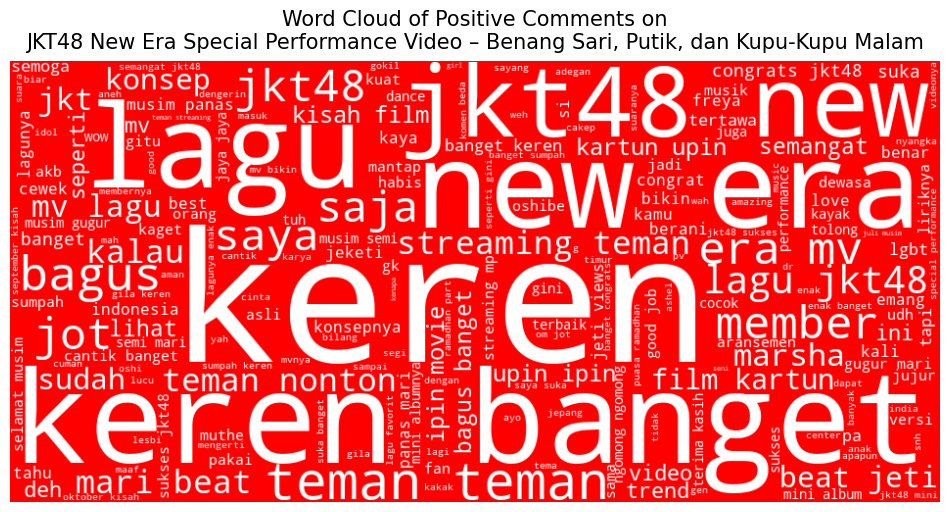

In [7]:
# Filter for positive comments
positive_comments = comments[comments['Sentiment'] == 'positive']['Comment_clean_words']

# Remove NaN values and filter out empty strings
positive_comments = positive_comments.dropna().loc[positive_comments != '']

# Remove occurrences of specified words
remove_words = ["nya", "ga", "gak", "nggak", "yg", "sih", "nih", "tp", "jg", "ya", "bgt", "yang"]
pattern = r'\b(' + '|'.join(remove_words) + r')\b'
positive_comments = positive_comments.str.replace(pattern, '', regex=True)

# Join all positive comments into a single string
positive_text = ' '.join(positive_comments)

# Generate the word cloud with all white text
wordcloud = WordCloud(
    width=950,
    height=450,
    background_color='red',
    color_func=lambda *args, **kwargs: 'white',  # Set all text color to white
    random_state=48
).generate(positive_text)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title(f'Word Cloud of Positive Comments on\n{VIDEO_TITLE}', fontsize=TITLE_FONT_SIZE, y=1.01)

plt.show()

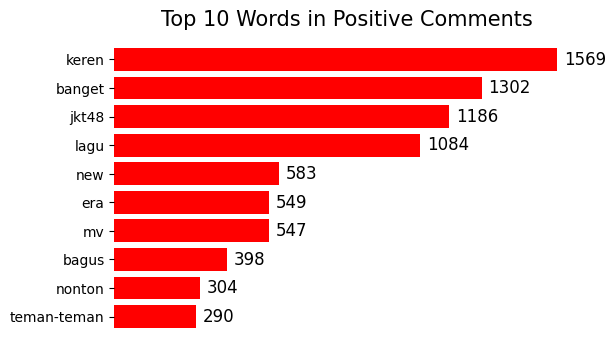

In [8]:
# Top Words in Positive Comments

# Split the text into words and count occurrences
words = positive_text.split()
word_counts = Counter(words)

# Get the top 10 most common words and sort them in descending order
top_10_words = word_counts.most_common(10)
top_10_df = pd.DataFrame(top_10_words, columns=['Word', 'Count'])

# Sort the DataFrame by 'Count' in descending order
top_10_df = top_10_df.sort_values(by='Count', ascending=True)

# Plotting the horizontal bar chart
plt.figure(figsize=(6, 4))
bars = plt.barh(top_10_df['Word'], top_10_df['Count'], color='red')

x_space = max(bar.get_width() for bar in bars) * 0.015

# Add data labels to each bar
for bar in bars:
    plt.text(
        bar.get_width() + x_space,  # Position the label to the right of the bar
        bar.get_y() + bar.get_height() / 2,  # Center the label vertically
        f"{bar.get_width()}",
        va='center',  # Align label vertically in the center
        fontsize=12,
        color='black'
    )

# Customize the chart
plt.xlabel('')
plt.title('Top 10 Words in Positive Comments', fontsize=TITLE_FONT_SIZE)
plt.xticks([])  # Remove x-axis ticks
plt.yticks(fontsize=10)
plt.box(False)  # Remove top and right borders

plt.show()

In [9]:
# Top Positive Comments
comments[comments['Sentiment']=='positive'][['Username', 'Comment', 'LikeCount', 'ReplyCount', 'Date', 'Sentiment']].head()


,Username,Comment,LikeCount,ReplyCount,Date,Sentiment
1,@driezkh,Performance Videonya kaya memberitahu kita ten...,2319,70,2023-03-20T17:56:27Z,positive
2,@adanjir1923,Satu persatu member diberikan kesempatan buat...,1885,63,2023-03-13T13:16:02Z,positive
3,@Jkt48990,"fiks, kalau kedepan jkt48 release single MVnya...",1863,80,2023-03-14T05:24:15Z,positive
5,@ZeeaAndra-xt5wz,"Terlepas dari kontroversi yang ada, sejujurnya...",915,30,2023-03-18T04:45:01Z,positive
6,@zahrasalsabila-kj1jd,Terlepas dari hate comen 18+. Jujur ini suatu ...,772,35,2023-03-13T13:14:58Z,positive


# Neutral Sentiment

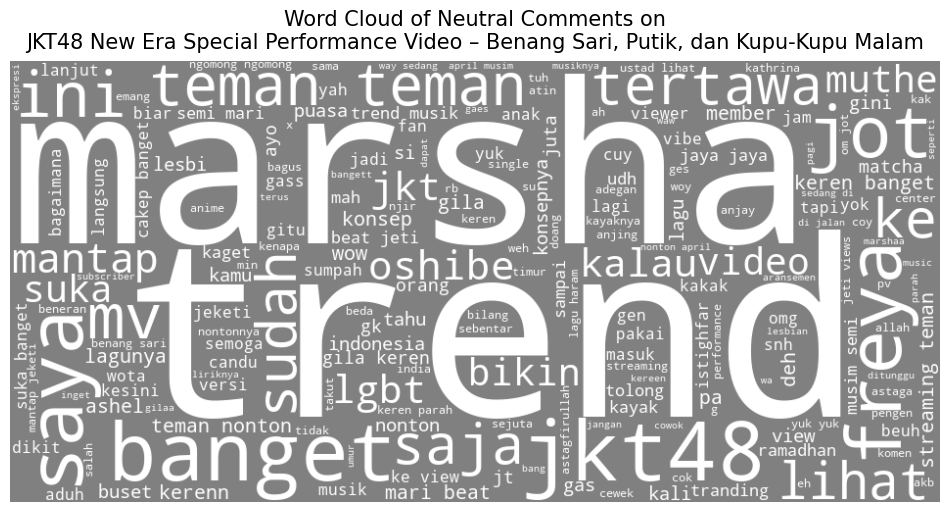

In [10]:
# Filter for neutral comments
neutral_comments = comments[comments['Sentiment'] == 'neutral']['Comment_clean_words']

# Remove NaN values and filter out empty strings
neutral_comments = neutral_comments.dropna().loc[neutral_comments != '']

# Remove occurrences of specified words
remove_words = ["nya", "ga", "gak", "nggak", "yg", "sih", "nih", "tp", "jg", "ya", "bgt", "ba", "guys", "yang"]
pattern = r'\b(' + '|'.join(remove_words) + r')\b'
neutral_comments = neutral_comments.str.replace(pattern, '', regex=True)

# Join all neutral comments into a single string
neutral_text = ' '.join(neutral_comments)

# Generate the word cloud
wordcloud = WordCloud(
    width=950,
    height=450,
    background_color='gray',
    color_func=lambda *args, **kwargs: 'white',
    random_state=48
).generate(neutral_text)  # Join unique words for the word cloud

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title(f'Word Cloud of Neutral Comments on\n{VIDEO_TITLE}', fontsize=TITLE_FONT_SIZE, y=1.01)

plt.show()

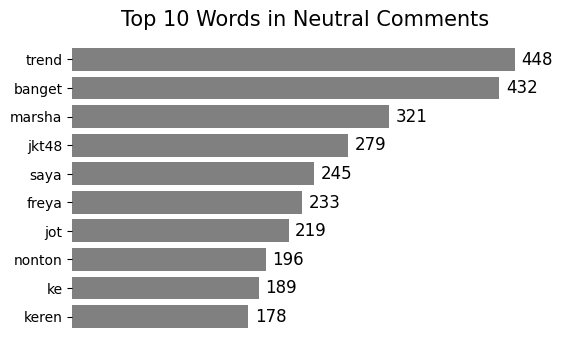

In [11]:
# Top Words in Neutral Comments

# Split the text into words and count occurrences
words = neutral_text.split()
word_counts = Counter(words)

# Get the top 10 most common words and sort them in descending order
top_10_words = word_counts.most_common(10)
top_10_df = pd.DataFrame(top_10_words, columns=['Word', 'Count'])

# Sort the DataFrame by 'Count' in descending order
top_10_df = top_10_df.sort_values(by='Count', ascending=True)

# Plotting the horizontal bar chart
plt.figure(figsize=(6, 4))
bars = plt.barh(top_10_df['Word'], top_10_df['Count'], color='gray')

x_space = max(bar.get_width() for bar in bars) * 0.015

# Add data labels to each bar
for bar in bars:
    plt.text(
        bar.get_width() + x_space,  # Position the label to the right of the bar
        bar.get_y() + bar.get_height() / 2,  # Center the label vertically
        f"{bar.get_width()}",
        va='center',  # Align label vertically in the center
        fontsize=12,
        color='black'
    )

# Customize the chart
plt.xlabel('')
plt.title('Top 10 Words in Neutral Comments', fontsize=TITLE_FONT_SIZE)
plt.xticks([])  # Remove x-axis ticks
plt.yticks(fontsize=10)
plt.box(False)  # Remove top and right borders

plt.show()

In [12]:
# Top Neutral Comments
comments[comments['Sentiment']=='neutral'][['Username', 'Comment', 'LikeCount', 'ReplyCount', 'Date', 'Sentiment']].head()


,Username,Comment,LikeCount,ReplyCount,Date,Sentiment
57,@aga050491,"Kathirna, Freya, Marsha, Muthe, Ashel.. bersin...",244,6,2023-03-31T02:41:15Z,neutral
62,@frezzbysnappywopapy,Wow rekor performa Youtube JKT48 pecah semua s...,236,22,2023-03-14T22:00:34Z,neutral
81,@mohammadriskyamin7831,"parah sih ini, aransemen musiknya cakep banget...",196,0,2023-03-14T01:51:36Z,neutral
93,@ratumasayuandreinacathleya1716,"Ayo guys naikin lagi views nyaa, ini ga kalah ...",183,10,2023-03-20T12:08:13Z,neutral
99,@harrast134,Beauty Shoot Moment\n\n2:47 Muthe\n2:50 Kathri...,175,4,2023-03-14T13:56:39Z,neutral


# Negative Sentiment

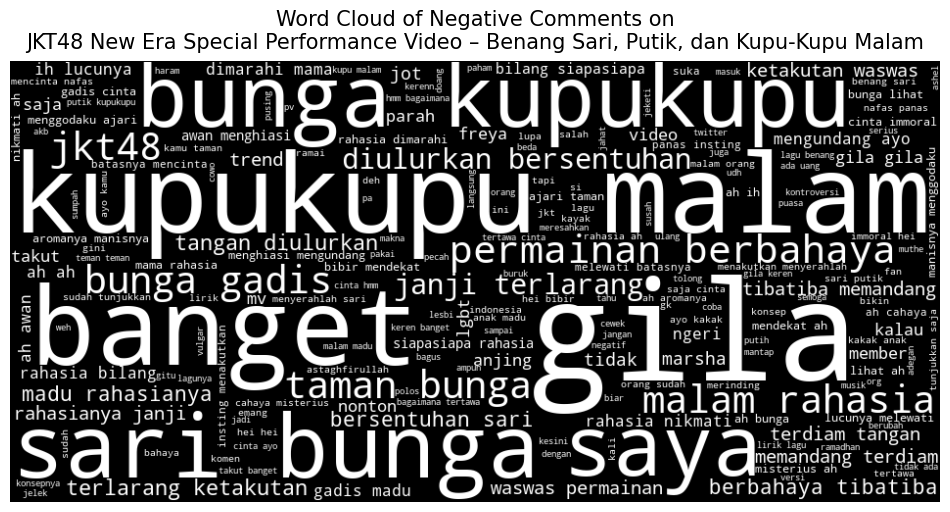

In [13]:
# Filter for negative comments
negative_comments = comments[comments['Sentiment'] == 'negative']['Comment_clean_words']

# Remove NaN values and filter out empty strings
negative_comments = negative_comments.dropna().loc[negative_comments != '']

# Remove occurrences of specified words
remove_words = ["nya", "ga", "gak", "nggak", "yg", "sih", "nih", "tp", "jg", "ya", "bgt", "ba", "guys", "yang"]
pattern = r'\b(' + '|'.join(remove_words) + r')\b'
negative_comments = negative_comments.str.replace(pattern, '', regex=True)

# Join all negative comments into a single string
negative_text = ' '.join(negative_comments)

# Generate the word cloud
wordcloud = WordCloud(
    width=950,
    height=450,
    background_color='black',  # Set background to black
    color_func=lambda *args, **kwargs: 'white',  # Set text color to white
    random_state=48
).generate(negative_text)  # Join unique words for the word cloud

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title(f'Word Cloud of Negative Comments on\n{VIDEO_TITLE}', fontsize=TITLE_FONT_SIZE, y=1.01)

plt.show()

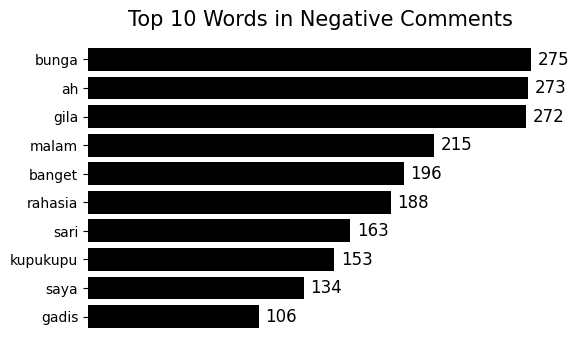

In [14]:
# Top Words in Negative Comments

# Split the text into words and count occurrences
words = negative_text.split()
word_counts = Counter(words)

# Get the top 10 most common words and sort them in descending order
top_10_words = word_counts.most_common(10)
top_10_df = pd.DataFrame(top_10_words, columns=['Word', 'Count'])

# Sort the DataFrame by 'Count' in descending order
top_10_df = top_10_df.sort_values(by='Count', ascending=True)

# Plotting the horizontal bar chart
plt.figure(figsize=(6, 4))
bars = plt.barh(top_10_df['Word'], top_10_df['Count'], color='black')

x_space = max(bar.get_width() for bar in bars) * 0.015

# Add data labels to each bar
for bar in bars:
    plt.text(
        bar.get_width() + x_space,  # Position the label to the right of the bar
        bar.get_y() + bar.get_height() / 2,  # Center the label vertically
        f"{bar.get_width()}",
        va='center',  # Align label vertically in the center
        fontsize=12,
        color='black'
    )

# Customize the chart
plt.xlabel('')
plt.title('Top 10 Words in Negative Comments', fontsize=TITLE_FONT_SIZE)
plt.xticks([])  # Remove x-axis ticks
plt.yticks(fontsize=10)
plt.box(False)  # Remove top and right borders

plt.show()

In [15]:
# Bottom Negative Comments
comments[comments['Sentiment']=='negative'][['Username', 'Comment', 'LikeCount', 'ReplyCount', 'Date', 'Sentiment']].tail()

,Username,Comment,LikeCount,ReplyCount,Date,Sentiment
11574,@summerbrulee,AMPUN,0,0,2023-03-13T13:03:57Z,negative
11579,@harisfadillah4187,ANJIR,0,0,2023-03-13T13:03:45Z,negative
11618,@Mkurniawan1,"saya mempertanyakan ini dulu, selama jiro meni...",0,0,2023-03-13T12:57:36Z,negative
11638,@alim-bu7qj,mundur,0,0,2023-03-13T11:10:15Z,negative
11639,@mutialifahsephira4881,"Bismillah all member, biar gaada tubir menubir",0,0,2023-03-13T10:51:33Z,negative
